# Instructions:
1. Create an overview of the problem being solved, e.g., what was the story behind the collection of the data, description of the attributes/features used,etc.
2. (Data Preprocessing and Exploratory Analysis) Present descriptive statistics as applicable (e.g., distribution, central tendency, variability) of the data before training the models. Clean the data if there are missing values, etc. You may perform feature engineering (i.e., creating new features out of the given features), but be sure to document your justifications. 
3. Split your data into proportions of 70% training set and 30% testing set.
4. Train the following models: (a) logistic regression classifier and (b) naive Bayes classifier on the dataset.
5. Evaluate the performance of the trained model. You may use additional performance measures if you want, but for now I will only require the calculation of the accuracy. The accuracy measures the fraction of correct classifications. With this, you need to generate the confusion matrix. You may read this if you haven't encountered this concept before: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20represents%20the,by%20model%20as%20other%20class. Remember to compute this matrix from the test set (not the training set).

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [31]:
warnings.filterwarnings("ignore")

# 4. Passenger Flight
URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

In [24]:
dataset = pd.read_csv("passenger_flight.csv")
np.random.seed(123)
dataset = dataset.sample(frac=1).reset_index(drop=True)
display(dataset.head(10))
display(dataset.info())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,53,0,1,946,1,1,1,2,...,2,2,5,2,4,3,2,0,0.0,0
1,1,1,55,1,1,1620,3,3,3,3,...,4,4,4,4,3,4,4,0,0.0,1
2,1,1,29,1,1,1400,5,2,2,2,...,5,4,2,2,5,2,5,0,0.0,1
3,1,1,49,1,1,850,5,5,5,5,...,2,2,3,2,5,2,3,0,0.0,1
4,1,1,42,1,1,3535,5,5,1,5,...,5,5,5,5,3,5,3,5,0.0,1
5,0,0,23,1,1,950,3,2,3,3,...,2,4,5,4,2,3,2,0,0.0,0
6,1,1,52,0,0,1916,4,3,4,3,...,4,4,2,4,4,3,4,27,33.0,0
7,0,1,31,1,1,3033,0,3,0,5,...,3,4,3,3,3,2,3,19,16.0,1
8,1,1,48,1,1,647,4,4,4,4,...,2,2,2,2,4,2,3,0,0.0,1
9,1,1,44,1,1,3291,1,1,5,1,...,5,5,5,5,5,5,5,15,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

None

## Data Preprocessing

- Features will be transformed to snake_case and uniformed.
- Features containing whitespaces will be replaced by '_'.
- If there are any missing values, it will be replaced by the mean of its corresponding column.

In [34]:
# Feature cleaning
dataset.columns = [c.replace(' ', '_') for c in dataset.columns]

# Find any missing values
def calculate_missing_values(data):
    total_missing = data.isnull().sum()  

    missing_data = pd.DataFrame({
        'Total Missing': total_missing,
    })
    return missing_data 

calculate_missing_values(dataset)

,Total Missing
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,0
Gate_location,0


In [35]:
# Replace missing values with its column's mean
dataset['Arrival_Delay_in_Minutes'] = dataset['Arrival_Delay_in_Minutes'].fillna(dataset['Arrival_Delay_in_Minutes'].mean())
calculate_missing_values(dataset)

,Total Missing
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,0
Gate_location,0


## Exploratory Analysis

AttributeError: 'numpy.int64' object has no attribute 'startswith'

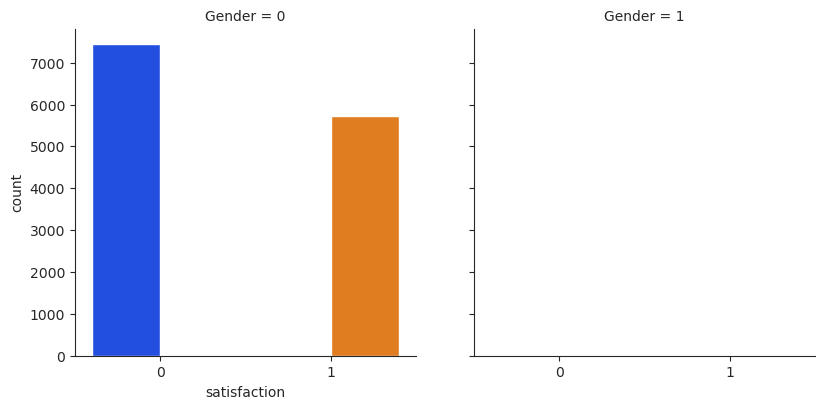

In [36]:
# Gender vs Satisfaction 
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Gender", col_wrap=5, data=dataset, kind="count", height=4, aspect=1.0, palette="bright", hue="satisfaction", legend=False)
    g.add_legend(title='Satisfaction', labels=['Not Satisfied', 'Satisfied'])
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

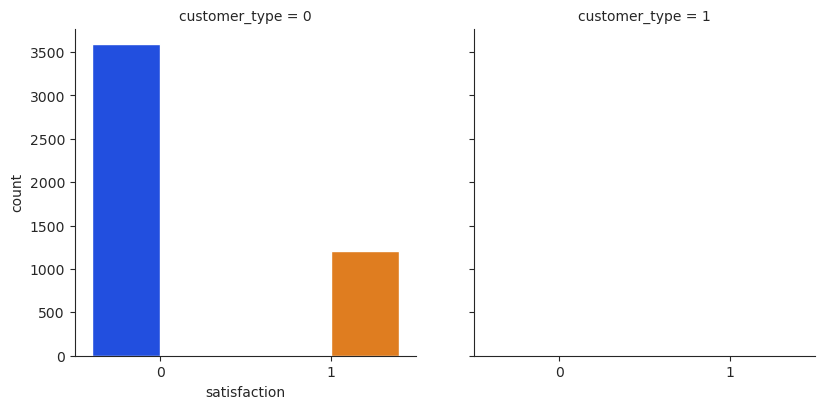

In [19]:
# Customer Type vs Satisfaction
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="customer_type", col_wrap=5, data=dataset, kind="count", height=4, aspect=1.0, palette="bright", hue="satisfaction", legend=False)

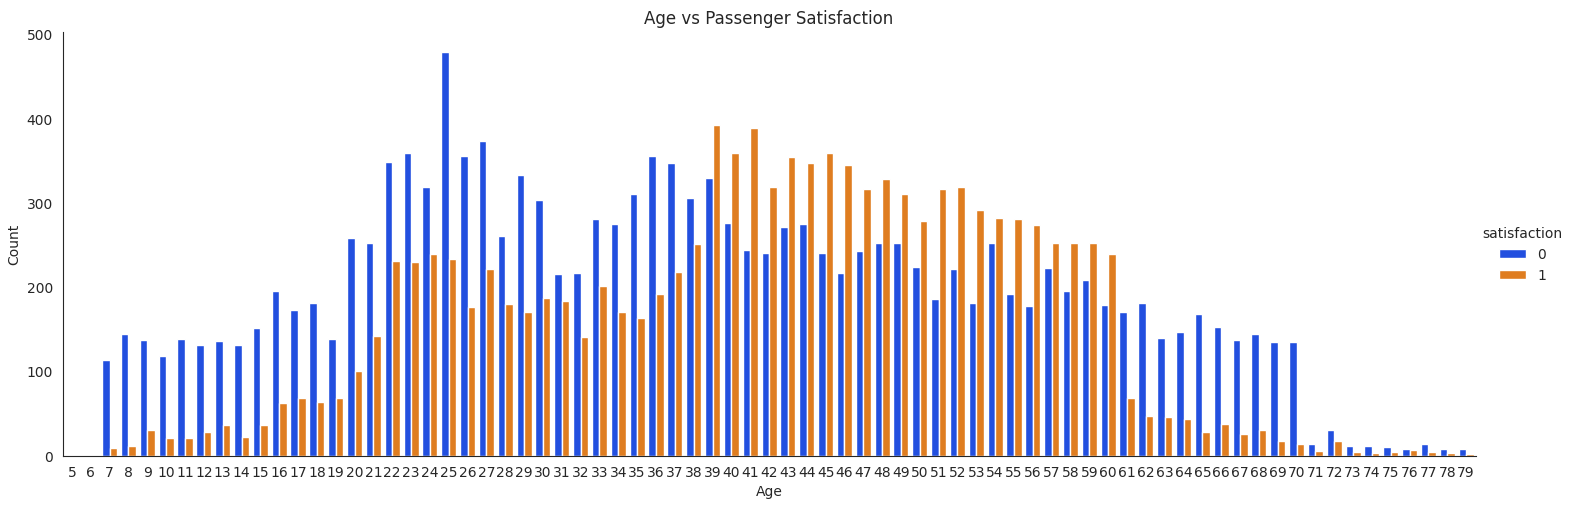

In [58]:
# Age vs Satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=dataset, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80), palette="bright")
    g.set_axis_labels('Age', 'Count')
    g.set(title='Age vs Passenger Satisfaction')

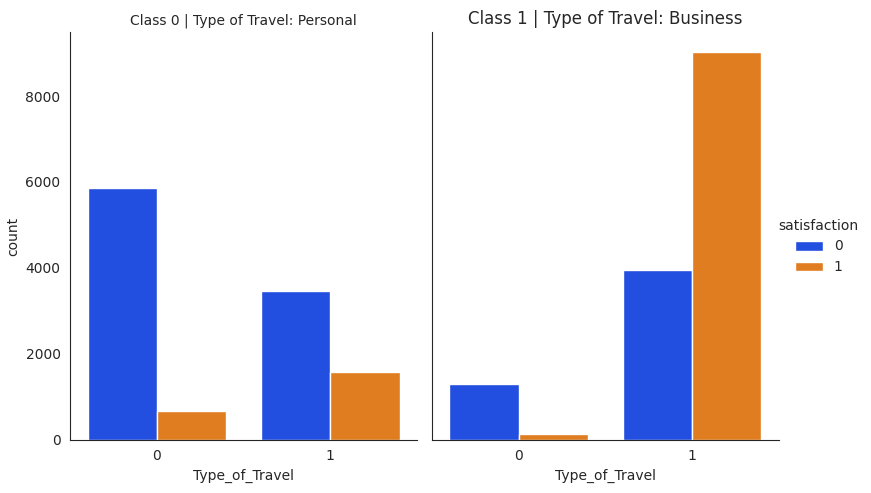

In [59]:
# Type of Travel, Class vs Satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x="Type_of_Travel", hue="satisfaction", col="Class", data=dataset, kind="count", height=5, aspect=.8, palette="bright")
    g.set_titles("Class {col_name} | Type of Travel: Personal")
    g.axes[0, 1].set_title("Class 1 | Type of Travel: Business")

<Axes: xlabel='Flight_Distance', ylabel='Density'>

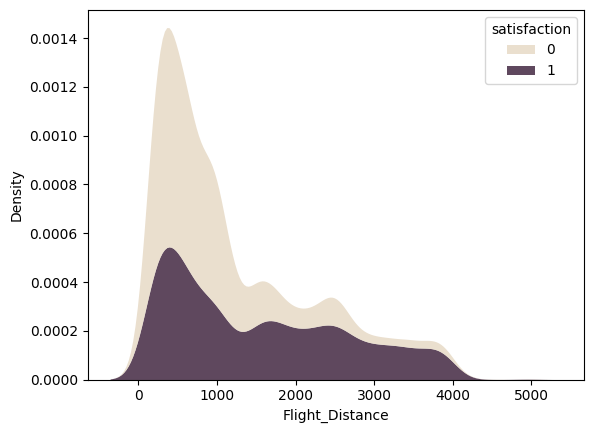

In [60]:
# Flight Distance vs Satisfaction
sns.kdeplot(data = dataset, x = "Flight_Distance",hue = "satisfaction" , shade = True,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0)

<Axes: xlabel='Departure_Delay_in_Minutes', ylabel='Arrival_Delay_in_Minutes'>

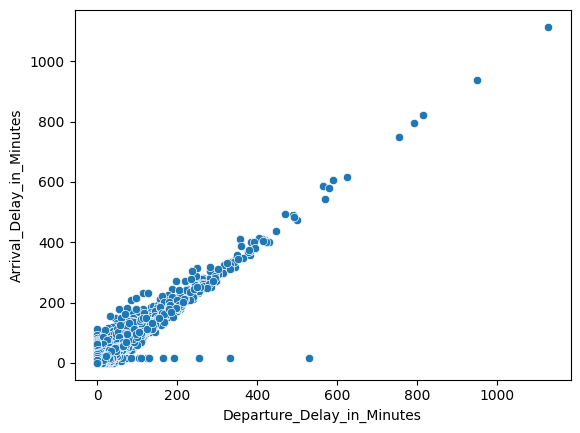

In [61]:
# Delay
sns.scatterplot(x = 'Departure_Delay_in_Minutes', y = 'Arrival_Delay_in_Minutes', data = dataset,palette="ch:.25")

Text(0.5, 1.0, 'Distribution of Satisfaction')

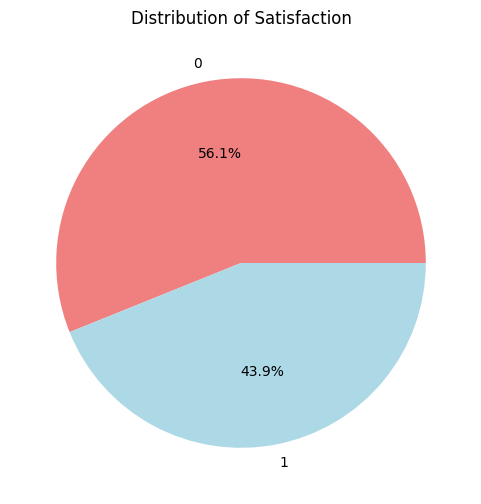

In [62]:
# Satisfaction
satisfaction_counts = dataset['satisfaction'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Satisfaction')

**Gender:** It can be observed that the distribution of satisfied and dissatisfied are quite the same between both genders. Dissatisfied customers are higher in number compared to the satisfied customers. </br>
**Customer Type:** Loyal customers are higher in number compared to the disloyal customers.</br>
**Age:** In age groups 39-60, there are more satisfied customers than the dissatisfied customers.</br>
**Type of Travel & Class:** Personal Travel has more dissatisfied customers compared to business travels. Business travels has more satisfied customers. </br>
**Satisfaction:** There are more dissatisfied customers than satisfied customers. It is worth note taking that more than half are dissatisfied customers. 

## Detection of Outliers and Removal
Interquartile Range (IQR) will be used to detect outliers. Outliers will be removed from the dataset.

In [63]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1330.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [11]:
# Remove Outliers
cleaned_ds = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Number of rows before removal: {len(dataset)}')
print(f'Number of rows before removal: {len(cleaned_ds)}')

NameError: name 'Q1' is not defined

## Features Correlation

In [10]:
correlation=cleaned_ds.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

NameError: name 'cleaned_ds' is not defined

## Splitting of Data

In [86]:
x = cleaned_ds.drop('satisfaction', axis=1)
y = cleaned_ds['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (18183, 22) (18183,)
Testing set shape: (7793, 22) (7793,)


## Confusion Matrix

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False


    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

## Logistic Regression

In [137]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [138]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=300000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __b_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid_function(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__b_intercept(X)
        self.W = np.zeros(X.shape[1])
        
        for i in range(self.num_iterations):
            
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            self.W -= self.learning_rate * gradient
            
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            loss = self.__loss(yp, y)
            
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__b_intercept(X)
        return self.__sigmoid_function(np.dot(X, self.W))

    def predict(self, X):
        return self.predict_prob(X).round()

In [139]:
log_res = LogisticRegressionScratch(learning_rate=0.1, num_iterations=300000)
log_res.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4416
           1       0.87      0.82      0.85      3377

    accuracy                           0.87      7793
   macro avg       0.87      0.86      0.87      7793
weighted avg       0.87      0.87      0.87      7793



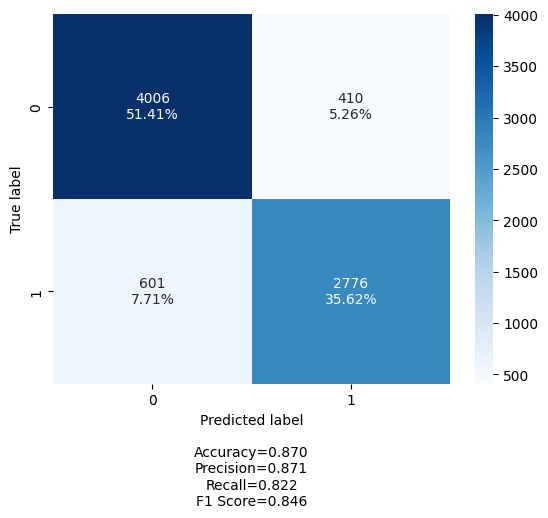

In [156]:
print(classification_report(y_test, log_res.predict(x_test)))

cm = confusion_matrix(y_test, log_res.predict(x_test))
make_confusion_matrix(cm)

### Using the Library

In [154]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4416
           1       0.87      0.82      0.85      3377

    accuracy                           0.87      7793
   macro avg       0.87      0.86      0.87      7793
weighted avg       0.87      0.87      0.87      7793



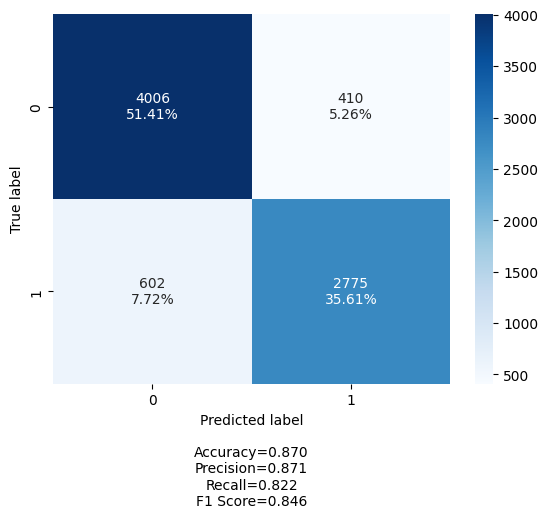

In [155]:
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

## Naive Bayes

In [149]:
class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes, class_counts = np.unique(y, return_counts=True)
        self.class_probs = class_counts / len(y)
        self.mean = {}
        self.variance = {}

        for c in self.classes:
            c_mask = (y == c)
            c_data = X[c_mask]

            # Calculate mean and variance for each feature for class c
            self.mean[c] = np.mean(c_data, axis=0)
            self.variance[c] = np.var(c_data, axis=0)

    def calculate_likelihood(self, x, mean, variance):
        exponent = np.exp(-((x - mean)**2) / (2 * variance))
        return (1 / (np.sqrt(2 * np.pi * variance))) * exponent

    def calculate_class_prob(self, x, c):
        class_prob = np.log(self.class_probs[c])

        for i in range(len(x)):
            feature_likelihood = self.calculate_likelihood(x[i], self.mean[c][i], self.variance[c][i])
            class_prob += np.log(feature_likelihood)

        return class_prob

    def predict_single(self, x):
        class_probs = [self.calculate_class_prob(x, c) for c in self.classes]
        return self.classes[np.argmax(class_probs)]

    def predict(self, X):
        predictions = [self.predict_single(x) for x in X]
        return np.array(predictions)

In [150]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4416
           1       0.87      0.81      0.84      3377

    accuracy                           0.86      7793
   macro avg       0.86      0.86      0.86      7793
weighted avg       0.86      0.86      0.86      7793



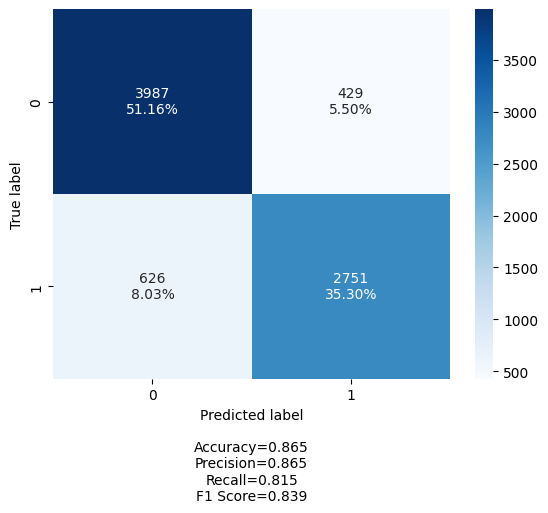

In [152]:
y_pred = nb_classifier.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

### Using Builtin Lib

In [146]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4416
           1       0.87      0.81      0.84      3377

    accuracy                           0.86      7793
   macro avg       0.86      0.86      0.86      7793
weighted avg       0.86      0.86      0.86      7793



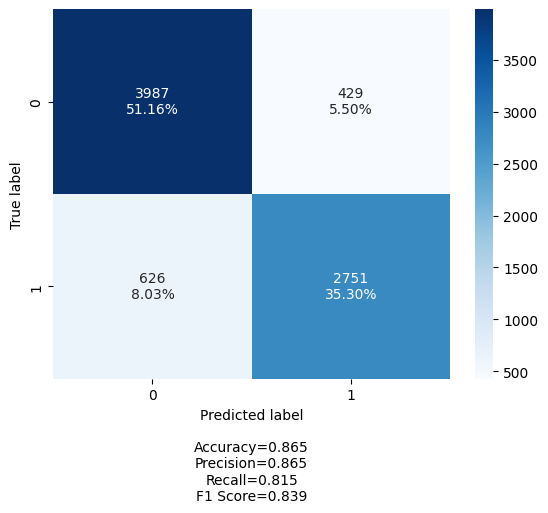

In [157]:
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)